# Simple Neural Network Model with different outputs

Input: single principal component based on all 15 indicators 

Output: optimal max-shape portfolio with various constraint options for the next period

## Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.regularizers import L2

import os
os.chdir(os.path.expanduser('../'))

from helper_functions import (train_and_evaluate_model, calculate_returns_for_model, 
                              calculate_metrics, calculate_returns_for_predictions)

In [3]:
os.chdir(os.path.expanduser('../data'))

from dotenv import load_dotenv
load_dotenv()

from DataProvider import DataProvider

In [4]:
data_provider = DataProvider()

df_countries, benchmark = data_provider.get_etf_data()
acwi_weights = data_provider.get_acwi_weights()
days_to_recalculate = data_provider.get_days_to_recalculate()

In [5]:
x = data_provider.get_formatted_features()

## Defining models for different outputs

Tight constraints for weights between 0.7 * benchmark_weight and 1.5 * benchmark_weights

In [6]:
y_tight_constraint = data_provider.get_formatted_targets(contraint_degree=0)
x_train, y_train, x_val, y_val, x_test, y_test = data_provider.train_train_split(x, y_tight_constraint)

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 162)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         2,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,067 (11.98 KB)

 Trainable params: 3,067 (11.98 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.7494 - val_loss: 2.5143
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4421 - val_loss: 2.2270
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1612 - val_loss: 1.9668
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9076 - val_loss: 1.7329
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6798 - val_loss: 1.5237
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4764 - val_loss: 1.3374
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2955 - val_loss: 1.1719
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1347 - val_loss: 1.0252
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9925 - val_loss: 0.8955
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8668 - val_loss: 0.7809
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7553 - val_loss: 0.6798
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6574 - val_loss: 0.5907

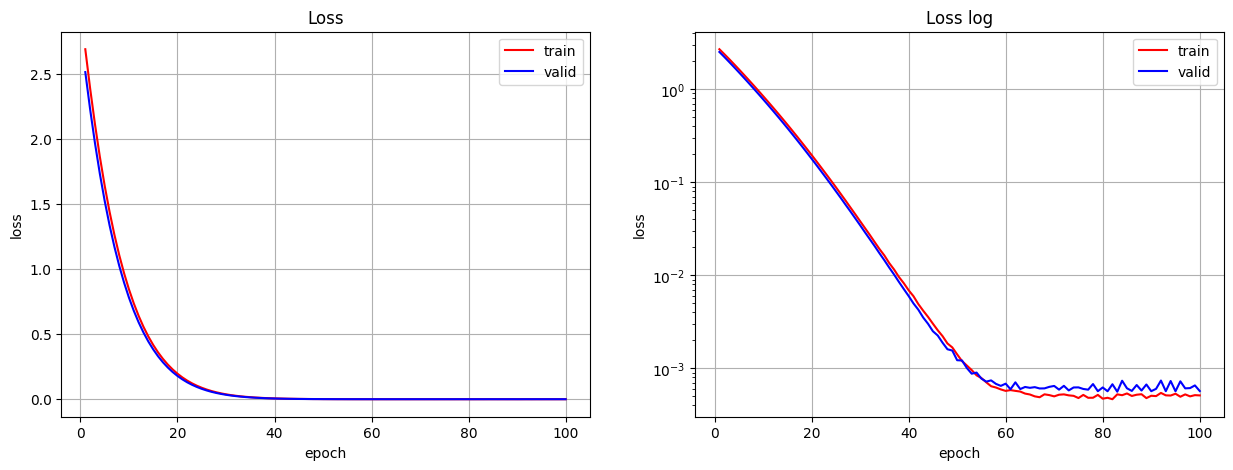

In [7]:
model_dnn_tight_constraints = Sequential((
    Flatten(input_shape=x_train.shape[1:]),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_dnn_tight_constraints, 
                         x_train, y_train,
                         x_val, y_val, 
                         x_test, y_test)

Normal constraints for weights between 0.5 * benchmark_weight and 2 * benchmark_weights

In [8]:
y_normal_constraint = data_provider.get_formatted_targets(contraint_degree=1)
x_train, y_train, x_val, y_val, x_test, y_test = data_provider.train_train_split(x, y_normal_constraint)

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 162)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         2,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,067 (11.98 KB)

 Trainable params: 3,067 (11.98 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.8065 - val_loss: 2.5683
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4954 - val_loss: 2.2782
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2119 - val_loss: 2.0152
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9549 - val_loss: 1.7784
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7242 - val_loss: 1.5663
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5177 - val_loss: 1.3771
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3337 - val_loss: 1.2088
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1698 - val_loss: 1.0594
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0248 - val_loss: 0.9271
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8964 - val_loss: 0.8100
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7828 - val_loss: 0.7066
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6825 - val_loss: 0.6153

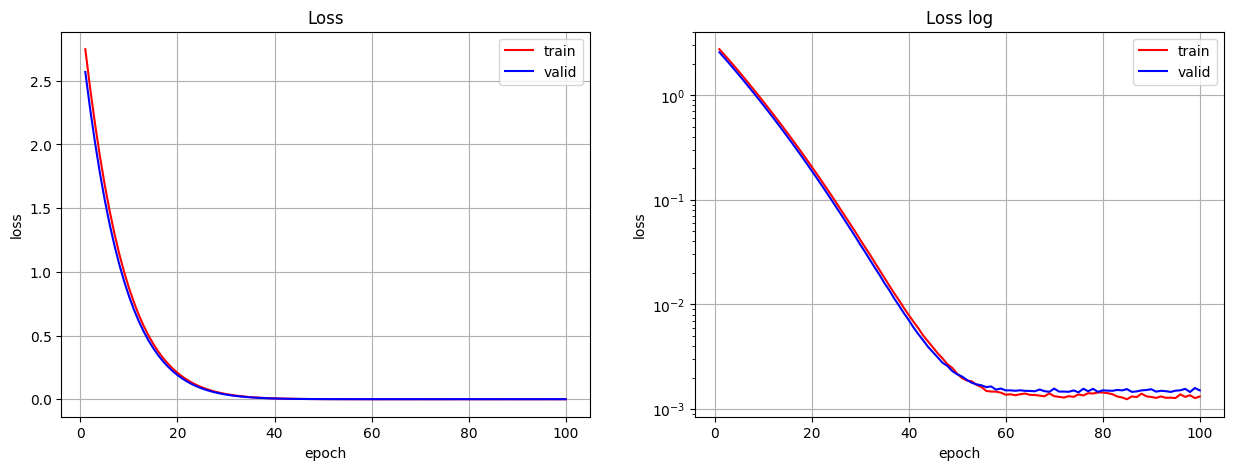

In [9]:
model_dnn_normal_constraints = Sequential((
    Flatten(input_shape=x_train.shape[1:]),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_dnn_normal_constraints, 
                         x_train, y_train,
                         x_val, y_val, 
                         x_test, y_test)

Loose constraints for weights between 0.3 * benchmark_weight and 3 * benchmark_weights

In [10]:
y_loose_constraints = data_provider.get_formatted_targets(contraint_degree=2)
x_train, y_train, x_val, y_val, x_test, y_test = data_provider.train_train_split(x, y_loose_constraints)

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 162)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │         2,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,067 (11.98 KB)

 Trainable params: 3,067 (11.98 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.7678 - val_loss: 2.5322
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4585 - val_loss: 2.2434
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1768 - val_loss: 1.9822
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9218 - val_loss: 1.7475
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6938 - val_loss: 1.5376
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4896 - val_loss: 1.3506
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3076 - val_loss: 1.1844
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1462 - val_loss: 1.0370
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0030 - val_loss: 0.9066
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8765 - val_loss: 0.7913
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7644 - val_loss: 0.6895
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6656 - val_loss: 0.5998

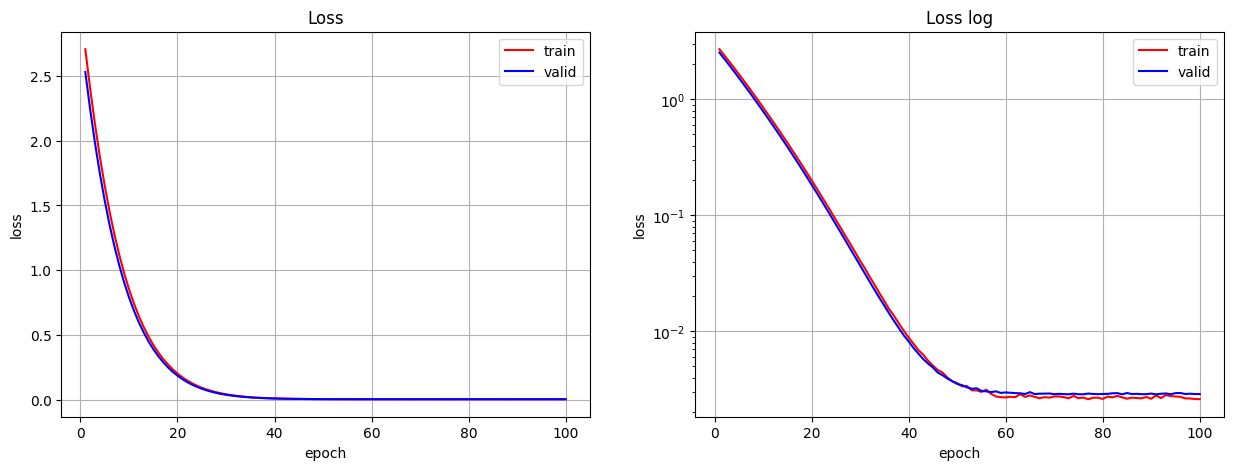

In [11]:
model_dnn_loose_constraints = Sequential((
    Flatten(input_shape=x_train.shape[1:]),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_dnn_loose_constraints,
                         x_train, y_train,
                         x_val, y_val,
                         x_test, y_test)

## Backtesting

In [12]:
test_split = int(0.8 * 288)
dates_for_test = days_to_recalculate[test_split:]

In [13]:
benchmark_test = benchmark[dates_for_test[0]:]
benchmark_returns = np.log(benchmark_test).diff().dropna()
cum_benchmark_returns = (1 + benchmark_returns).cumprod() - 1
cum_benchmark_returns.loc[dates_for_test[0]] = 0
cum_benchmark_returns.sort_index(inplace=True)

In [14]:
dates_for_test.insert(29, df_countries.index.values[-1])
df_prices_test = df_countries[dates_for_test[0]:]
df_returns_test = np.log(df_prices_test).diff().fillna(0)

In [15]:
(total_ret_tight, cum_total_ret_tight) = calculate_returns_for_model(
    model_dnn_tight_constraints, x_test, dates_for_test, df_returns_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [16]:
predictions_tight = model_dnn_tight_constraints.predict(x_test)
predictions_restricted = data_provider.apply_output_contraints(predictions_tight, contraint_degree=0)

total_returns_applied_tight_restrictions, cum_total_returns_applied_tight_restrictions = calculate_returns_for_predictions(
        predictions_restricted, dates_for_test, df_returns_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


In [17]:
(total_ret_normal, cum_total_ret_normal) = calculate_returns_for_model(
    model_dnn_normal_constraints, x_test, dates_for_test, df_returns_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [18]:
predictions_normal = model_dnn_normal_constraints.predict(x_test)
predictions_restricted_normal = data_provider.apply_output_contraints(predictions_normal, contraint_degree=1)

total_returns_applied_normal_restrictions, cum_total_returns_applied_normal_restrictions = calculate_returns_for_predictions(
        predictions_restricted_normal, dates_for_test, df_returns_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


In [19]:
(total_ret_loose, cum_total_ret_loose) = calculate_returns_for_model(
    model_dnn_loose_constraints, x_test, dates_for_test, df_returns_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/stepWARNING:tensorflow:6 out of the last 10 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001647EC21F80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [20]:
predictions_loose = model_dnn_loose_constraints.predict(x_test)
predictions_restricted_loose = data_provider.apply_output_contraints(predictions_loose, contraint_degree=2)

total_returns_applied_loose_restrictions, cum_total_returns_applied_loose_restrictions = calculate_returns_for_predictions(
        predictions_restricted_loose, dates_for_test, df_returns_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


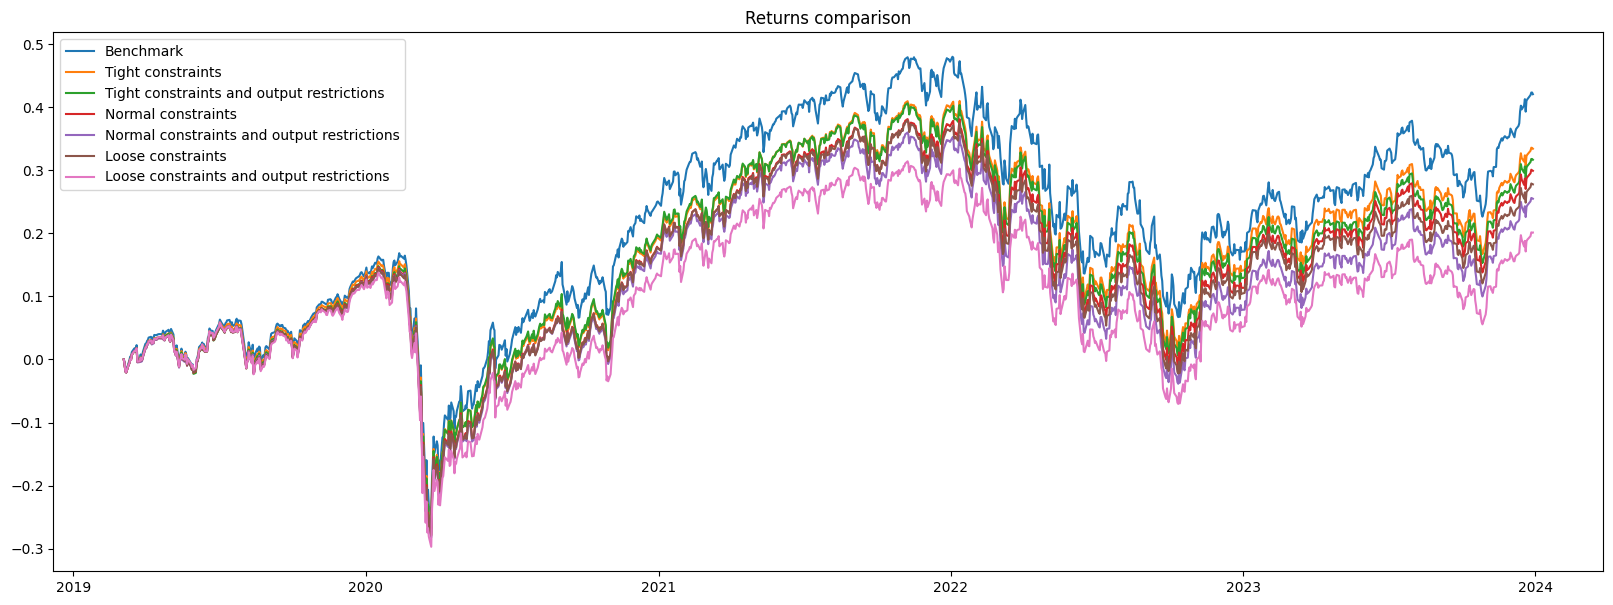

In [24]:
plt.figure(figsize=(20, 7))
plt.plot(cum_benchmark_returns, label='Benchmark')
plt.plot(cum_total_ret_tight, label='Tight constraints')
plt.plot(cum_total_returns_applied_tight_restrictions, label='Tight constraints and output restrictions')
plt.plot(cum_total_ret_normal, label='Normal constraints')
plt.plot(cum_total_returns_applied_normal_restrictions, label='Normal constraints and output restrictions')
plt.plot(cum_total_ret_loose, label='Loose constraints')
plt.plot(cum_total_returns_applied_loose_restrictions, label='Loose constraints and output restrictions')
plt.legend()
plt.title('Returns comparison')
plt.show()

In [22]:
df_results = pd.DataFrame(columns=['Annual Returns',
                                   'Annual Volatility',
                                   'Annual Sharpe Ratio'])

calculate_metrics(benchmark_returns, df_results, 'Benchmark')
calculate_metrics(total_ret_tight, df_results, 'Tight constraint')
calculate_metrics(total_returns_applied_tight_restrictions, df_results, 'Tight constraint and output restrictions')
calculate_metrics(total_ret_normal, df_results, 'Normal constraint')
calculate_metrics(total_returns_applied_normal_restrictions, df_results, 'Normal constraint and output restrictions')
calculate_metrics(total_ret_loose, df_results, 'Loose constraint')
calculate_metrics(total_returns_applied_loose_restrictions, df_results, 'Loose constraint and output restrictions')

df_results = df_results.astype(float).round(4)
df_results

,Annual Returns,Annual Volatility,Annual Sharpe Ratio
Benchmark,0.0768,0.2033,0.3775
Tight constraint,0.0623,0.2007,0.3106
Tight constraint and output restrictions,0.0594,0.2008,0.2960
Normal constraint,0.0565,0.2007,0.2815
Normal constraint and output restrictions,0.0489,0.2015,0.2428
Loose constraint,0.0528,0.1994,0.2651
Loose constraint and output restrictions,0.0395,0.2008,0.1965
